In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.DataFrame({'x':[1,1,0,1],'y':[1,1,0,0],'z':[1,0,1,0],'Label':['A','A','B','B']})
df

,x,y,z,Label
0,1,1,1,A
1,1,1,0,A
2,0,0,1,B
3,1,0,0,B


total ones in 'x' =3
count of label A when x= 1 is 2
count of label B when x=1 is 1

total zeros in 'x' = 1
count of label A when x= 0 is 0
count of label B when x=0 is 1

entropy= -p*log2(p)

In [3]:
entropy_x_1=(-2/3*np.log2(2/3))+(-1/3*np.log2(1/3))
print('entropy_x_1',entropy_x_1)

entropy_x_0=(-0/1*np.log2(0/1))+(-1/1*np.log2(1/1))
print('entropy_x_0',entropy_x_0)

entropy_x_1 0.9182958340544896
entropy_x_0 nan


In [4]:
entropy_y_1=(-2/2*np.log2(2/2))+(-0/2*np.log2(0/2))
print('entropy_y_1',entropy_y_1)

entropy_y_0=(-0/2*np.log2(0/2))+(-2/2*np.log2(2/2))
print('entropy_y_0',entropy_y_0)

entropy_y_1 nan
entropy_y_0 nan


In [5]:
entropy_z_1=(-1/2*np.log2(1/2))+(-1/2*np.log2(1/2))
print('entropy_z_1',entropy_z_1)

entropy_z_0=(-1/2*np.log2(1/2))+(-1/2*np.log2(1/2))
print('entropy_z_0',entropy_z_0)

entropy_z_1 1.0
entropy_z_0 1.0


# information gain=1-sv/s*E

sv=category count  
s= total record  
E= Entropy

In [6]:
df

,x,y,z,Label
0,1,1,1,A
1,1,1,0,A
2,0,0,1,B
3,1,0,0,B


In [7]:
IG_x=1-(3/4*0.918 + 1/4*0)
print ('IG_X= ',IG_x)

IG_y=1-(2/4*0 + 2/4*0)
print ('IG_y= ', IG_y)

IG_z=1-(2/4*1 + 2/4*1)
print ('IG_z= ', IG_z)


IG_X=  0.3115
IG_y=  1.0
IG_z=  0.0


# Gini Index

gini impurity=1-p2


In [8]:
df=pd.DataFrame({'x':[17,10,2,11],'y':[20,15,50,10],'z':[10,5,20,25],'Label':['P','N','P','N']})
df

,x,y,z,Label
0,17,20,10,P
1,10,15,5,N
2,2,50,20,P
3,11,10,25,N


In [9]:
Gx_gt_10=1-(np.square(2/3)+np.square(1/3))
print('Gx_gt_10=',Gx_gt_10)

Gx_lt_10=1-(np.square(0/1)+np.square(1/1))
print('Gx_lt_10=',Gx_lt_10)

gini_impurity_x=(3/4)*Gx_gt_10+(1/4)*Gx_lt_10
print('gini_impurity_x= ',gini_impurity_x)

Gx_gt_10= 0.4444444444444444
Gx_lt_10= 0.0
gini_impurity_x=  0.3333333333333333


In [10]:
Gy_gt_10=1-(np.square(2/4)+np.square(2/4))
print('Gy_gt_10 = ',Gy_gt_10)

gini_impurity_y=(4/4)*Gy_gt_10
print('gini_impurity_y= ',gini_impurity_y)

Gy_gt_10 =  0.5
gini_impurity_y=  0.5


In [11]:
Gz_gt_10=1-(np.square(1/3)+np.square(2/3))
print('Gz_gt_10=',Gz_gt_10)

Gz_lt_10=1-(np.square(1/1)+np.square(0/1))
print('Gz_lt_10=',Gz_lt_10)

gini_impurity_z=(3/4)*Gz_gt_10+(1/4)*Gz_lt_10
print('gini_impurity_z= ',gini_impurity_z)

Gz_gt_10= 0.4444444444444444
Gz_lt_10= 0.0
gini_impurity_z=  0.3333333333333333


In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [14]:
data=pd.read_csv(r"C:\Users\satya\OneDrive\Desktop\DATATRAINED\Files-main\Files-main\wine.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [15]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [18]:
#categorical column convert into numeric data using encoding method
from sklearn.preprocessing import OrdinalEncoder

In [19]:
ord_enc=OrdinalEncoder(categories=[['Low','Medium','High']])
df1=ord_enc.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [20]:
data['Alcohol_content']=df1

In [21]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


# ploting heatmap(correlation matrix)

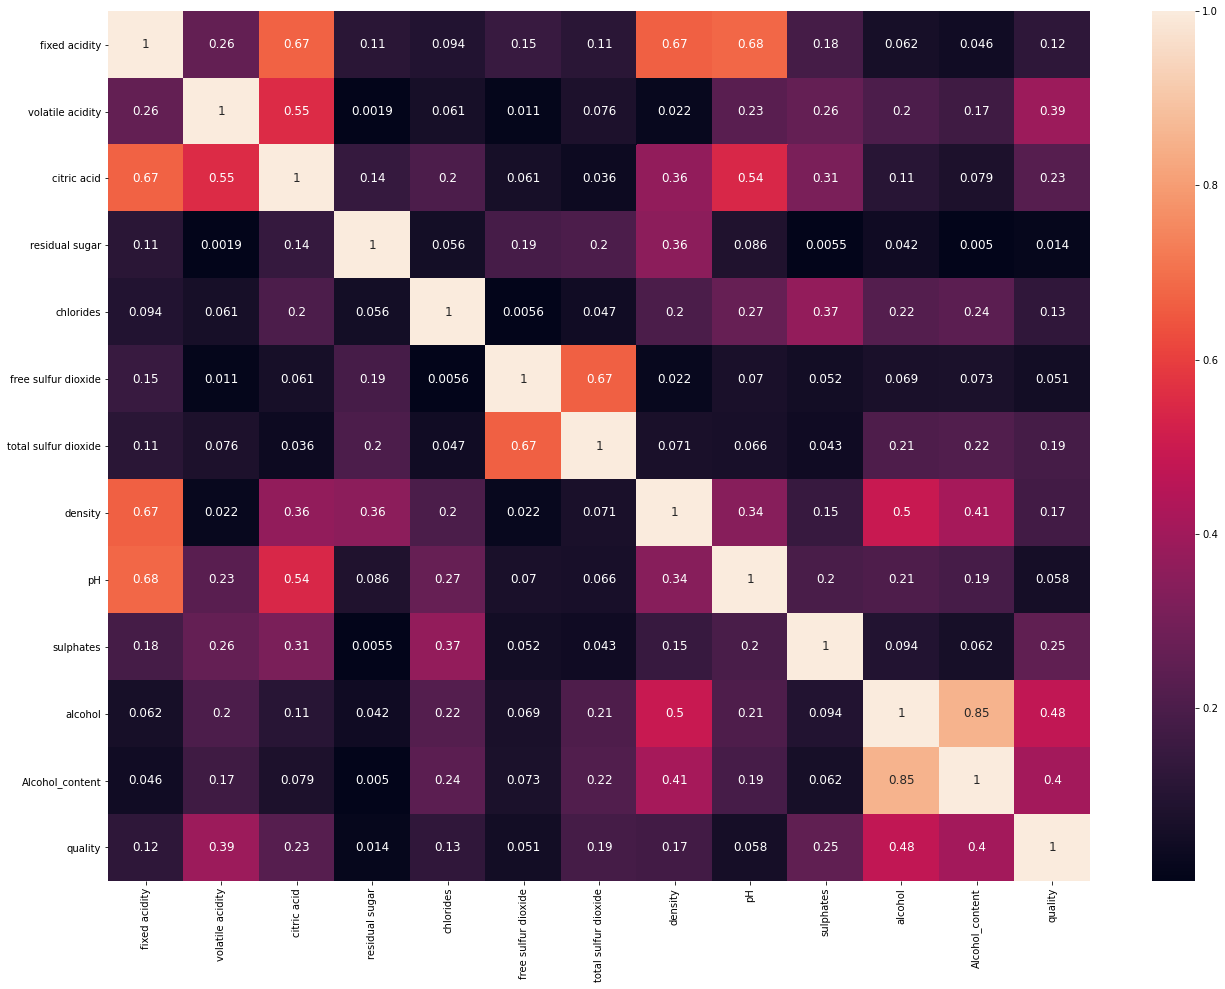

In [22]:
df_corr=data.corr().abs()#this code will get the cofficient of one variable vs all other veriable(Relationship)

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()

# make sure they are really correlated

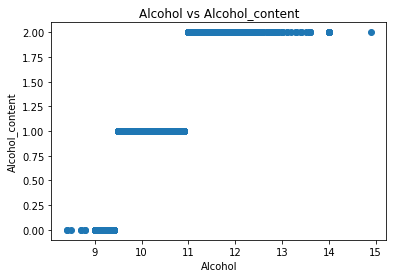

In [25]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_content')
plt.title('Alcohol vs Alcohol_content')
plt.show()

we see clear trend as and when alcohol level increases its content also increasing(there is a multicore leanearty present) so we can delet one of them

In [26]:
x=data.drop(columns=['quality','Alcohol_content'])
y=data['quality']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [28]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
feature_name=list(x.columns)
class_name=list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [39]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus

#creat a dot_file which stores the tree structure
dot_data=export_graphviz(clf,feature_names=feature_name,rounded=True,filled=True)
#draw graph
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png("myTree.png")
#show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found